**MSc Computational Physics AUTh**<br>
**Academic Year: 2024-2025**<br>
**Master's Thesis**<br>

**Thesis Title:**<br>  
# **"Reconstruction of the EoSs of Exotic Stars using ML and ANNs regression models"**

**Implemented by: Ioannis Stergakis**<br>
**AEM: 4439**<br>

**Jupyter Notebook: JN2b**<br>
**Name: "ExoticStarsResults_2.ipynb"**<br>

**Description:**<br> 
**1. Examples of sampling, displaying and saving data for regression purposes**

**Abbrevations**:<br>
**ES -> Exotic Star**<br>
**NS -> Neutron Star**<br>
**QS -> Quark Star**<br>

In [1]:
# Importing useful modules
import numpy as np 
import sympy as smp 
import matplotlib.pyplot as plt
from ExoticStarsDataHandling import *

## B. Exotic Stars Results: Sampling and displaying data for regression purposes

### **1. Neutron Stars**

#### **1.1 Sampling and plotting Slope $(\frac{dE_c}{dP_c})$ and Energy on center ($E_c$) data, along with the respective $E_c-P_c$, $\frac{dE_c}{dP_c} - P_c$ and $c_s-P_c$ curves**

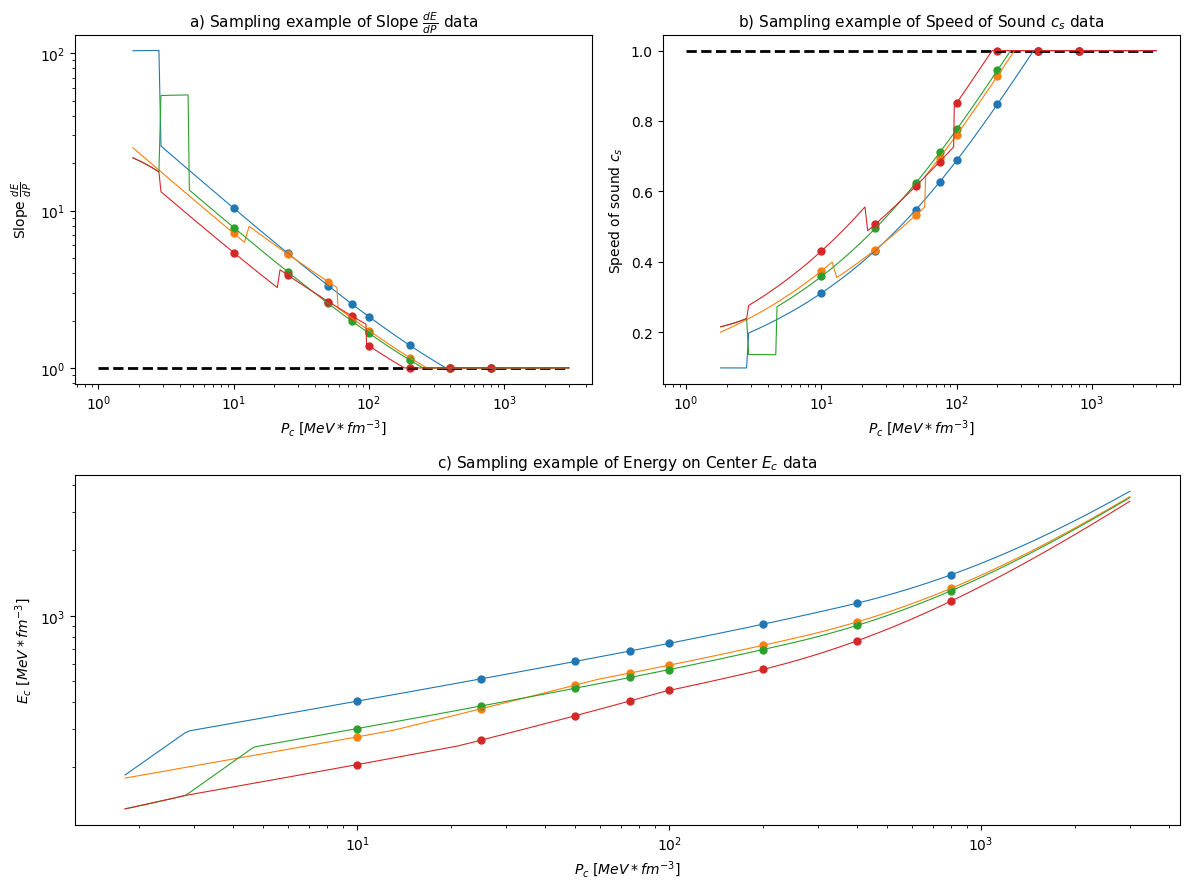

In [2]:
fig_sample_EOS_NS, axes_sample_EOS_NS = plt.subplots(figsize=(12,9))
axis_sample_slope_NS = plt.subplot2grid((2,2),(0,0))
axis_sample_cs_NS = plt.subplot2grid((2,2),(0,1))
axis_sample_energy_NS = plt.subplot2grid((2,2),(1,0),colspan=2)

# Pressure points, on which the values of Slope (dE_dP) and Energy density will be collected
pressure_points = [10,25,50,75,100,200,400,800]

# Sampling Slope (dE_dP) and Energy density data without observational noise (1 sample per EOS curve)
slope_sample_HLPS2_ADDDL,energy_sample_HLPS2_ADDDL= polyNSdata().sample_EOS("HLPS-2_ADDDL_sol.csv",Pc_points=pressure_points,noiseSl_mv=0,noiseSl_std=0,noiseEc_mv=0,noiseEc_std=0)
slope_sample_HLPS2_DCDCL,energy_sample_HLPS2_DCDCL= polyNSdata().sample_EOS("HLPS-2_DCDCL_sol.csv",Pc_points=pressure_points,noiseSl_mv=0,noiseSl_std=0,noiseEc_mv=0,noiseEc_std=0)
slope_sample_HLPS3_ADDDL,energy_sample_HLPS3_ADDDL= polyNSdata().sample_EOS("HLPS-3_ADDDL_sol.csv",Pc_points=pressure_points,noiseSl_mv=0,noiseSl_std=0,noiseEc_mv=0,noiseEc_std=0)
slope_sample_HLPS3_DCDCL,energy_sample_HLPS3_DCDCL= polyNSdata().sample_EOS("HLPS-3_DCDCL_sol.csv",Pc_points=pressure_points,noiseSl_mv=0,noiseSl_std=0,noiseEc_mv=0,noiseEc_std=0)

# Plotting the Slope (dE_dP) sampling data
axis_sample_slope_NS.plot(pressure_points,slope_sample_HLPS2_ADDDL,".",ms=10,color='#1f77b4')
axis_sample_slope_NS.plot(pressure_points,slope_sample_HLPS2_DCDCL,".",ms=10,color='#ff7f0e')
axis_sample_slope_NS.plot(pressure_points,slope_sample_HLPS3_ADDDL,".",ms=10,color='#2ca02c')
axis_sample_slope_NS.plot(pressure_points,slope_sample_HLPS3_DCDCL,".",ms=10,color='#d62728')

# Plotting the causality limit curve, i.e. the curve Slope=1
axis_sample_slope_NS.plot([1,3000],[1,1],"--",lw=2,color="black")

# Plotting the respective Slope (dE_dP) vs Pressure 2D curves
polyNSdata().plot_slope_curve("HLPS-2_ADDDL_sol.csv",axis_sample_slope_NS,'#1f77b4',"polytropic",850)
polyNSdata().plot_slope_curve("HLPS-2_DCDCL_sol.csv",axis_sample_slope_NS,'#ff7f0e',"polytropic",850)
polyNSdata().plot_slope_curve("HLPS-3_ADDDL_sol.csv",axis_sample_slope_NS,'#2ca02c',"polytropic",850)
polyNSdata().plot_slope_curve("HLPS-3_DCDCL_sol.csv",axis_sample_slope_NS,'#d62728',"polytropic",850)

# Adding labels, bounds and scale on axes and title for clarity
axis_sample_slope_NS.set_title(r"a) Sampling example of Slope $\frac{dE}{dP}$ data", fontsize=11)
axis_sample_slope_NS.set_xlabel(r"$P_c$ $[MeV*fm^{-3}]$",fontsize=10)
axis_sample_slope_NS.set_ylabel(r"Slope $\frac{dE}{dP}$",fontsize=10)
axis_sample_slope_NS.set_xscale("log")
axis_sample_slope_NS.set_yscale("log")

# Getting the Speed of Sound (c_s) sampling data
cs_sample_HLPS2_ADDDL = np.sqrt(1/np.array(slope_sample_HLPS2_ADDDL))
cs_sample_HLPS2_DCDCL = np.sqrt(1/np.array(slope_sample_HLPS2_DCDCL))
cs_sample_HLPS3_ADDDL = np.sqrt(1/np.array(slope_sample_HLPS3_ADDDL))
cs_sample_HLPS3_DCDCL = np.sqrt(1/np.array(slope_sample_HLPS3_DCDCL))

# Plotting the Speed of Sound (c_s) sampling data
axis_sample_cs_NS.plot(pressure_points,cs_sample_HLPS2_ADDDL,".",ms=10,color='#1f77b4')
axis_sample_cs_NS.plot(pressure_points,cs_sample_HLPS2_DCDCL,".",ms=10,color='#ff7f0e')
axis_sample_cs_NS.plot(pressure_points,cs_sample_HLPS3_ADDDL,".",ms=10,color='#2ca02c')
axis_sample_cs_NS.plot(pressure_points,cs_sample_HLPS3_DCDCL,".",ms=10,color='#d62728')

# Plotting the causality limit curve, i.e. the curve Slope=1
axis_sample_cs_NS.plot([1,3000],[1,1],"--",lw=2,color="black")

# Plotting the respective Speed of Sound vs Pressure 2D curves
polyNSdata().plot_cs_curve("HLPS-2_ADDDL_sol.csv",axis_sample_cs_NS,'#1f77b4',"polytropic",850)
polyNSdata().plot_cs_curve("HLPS-2_DCDCL_sol.csv",axis_sample_cs_NS,'#ff7f0e',"polytropic",850)
polyNSdata().plot_cs_curve("HLPS-3_ADDDL_sol.csv",axis_sample_cs_NS,'#2ca02c',"polytropic",850)
polyNSdata().plot_cs_curve("HLPS-3_DCDCL_sol.csv",axis_sample_cs_NS,'#d62728',"polytropic",850)

# Adding labels, bounds and scale on axes and title for clarity
axis_sample_cs_NS.set_title(r"b) Sampling example of Speed of Sound $c_s$ data", fontsize=11)
axis_sample_cs_NS.set_xlabel(r"$P_c$ $[MeV*fm^{-3}]$",fontsize=10)
axis_sample_cs_NS.set_ylabel(r"Speed of sound $c_s$",fontsize=10)
axis_sample_cs_NS.set_xscale("log")


# Plotting the Energy sampling data
axis_sample_energy_NS.plot(pressure_points,energy_sample_HLPS2_ADDDL,".",ms=10,color='#1f77b4')
axis_sample_energy_NS.plot(pressure_points,energy_sample_HLPS2_DCDCL,".",ms=10,color='#ff7f0e')
axis_sample_energy_NS.plot(pressure_points,energy_sample_HLPS3_ADDDL,".",ms=10,color='#2ca02c')
axis_sample_energy_NS.plot(pressure_points,energy_sample_HLPS3_DCDCL,".",ms=10,color='#d62728')

# Plotting the respective EOS 2D curves
polyNSdata().plot_EOS_curve("HLPS-2_ADDDL_sol.csv",axis_sample_energy_NS,'#1f77b4',"polytropic",850)
polyNSdata().plot_EOS_curve("HLPS-2_DCDCL_sol.csv",axis_sample_energy_NS,'#ff7f0e',"polytropic",850)
polyNSdata().plot_EOS_curve("HLPS-3_ADDDL_sol.csv",axis_sample_energy_NS,'#2ca02c',"polytropic",850)
polyNSdata().plot_EOS_curve("HLPS-3_DCDCL_sol.csv",axis_sample_energy_NS,'#d62728',"polytropic",850)

# Adding labels, bounds and scale on axes and title for clarity
axis_sample_energy_NS.set_title(r"c) Sampling example of Energy on Center $E_c$ data", fontsize=11)
axis_sample_energy_NS.set_xlabel(r"$P_c$ $[MeV*fm^{-3}]$",fontsize=10)
axis_sample_energy_NS.set_ylabel(r"$E_c$ $[MeV*fm^{-3}]$",fontsize=10)
axis_sample_energy_NS.set_xscale("log")
axis_sample_energy_NS.set_yscale("log")


# Removing the frame and the ticks of the total figure
axes_sample_EOS_NS.spines['top'].set_visible(False)
axes_sample_EOS_NS.spines['right'].set_visible(False)
axes_sample_EOS_NS.spines['bottom'].set_visible(False)
axes_sample_EOS_NS.spines['left'].set_visible(False)
axes_sample_EOS_NS.set_xticks([])
axes_sample_EOS_NS.set_yticks([])
plt.tight_layout()
plt.show()

#### **1.2 Sampling and plotting  Mass and Radius data, along with their respective $M-R$ curves**

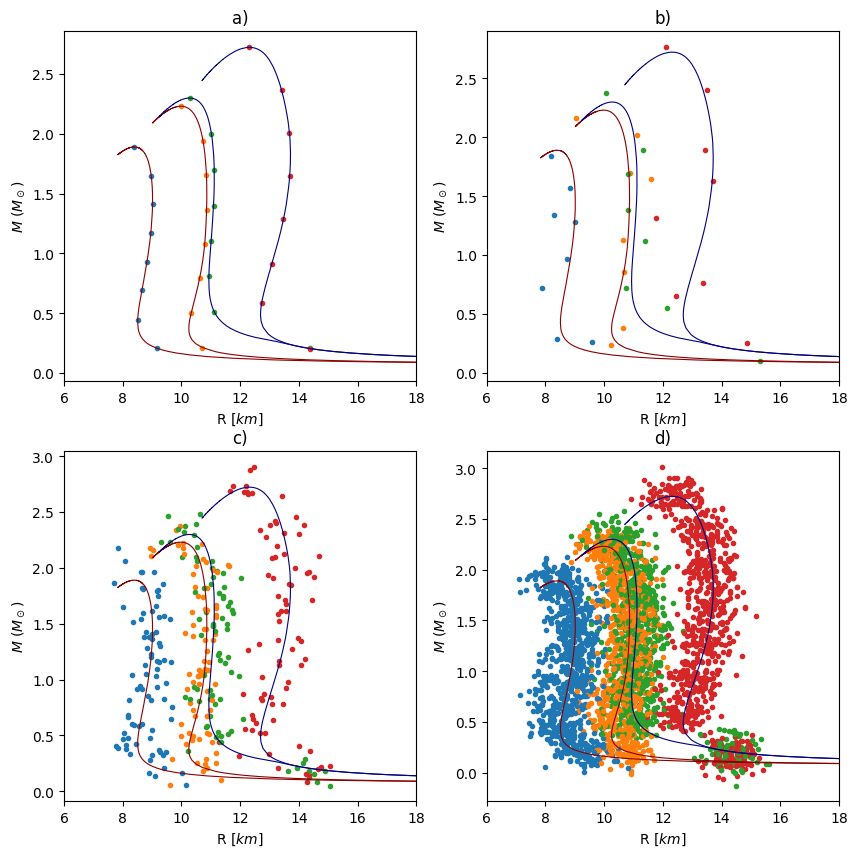

In [6]:
# Defining the figure and the axes
fig_sample_MR_NS,axes_sample_MR_NS = plt.subplots(2,2,figsize=(10,10))
points_mr = 8

# Sampling Mass and Radius data without observational noise (1 sample per M-R curve)
mass_sample_HLPS2_ADDDL_1,radius_sample_HLPS2_ADDDL_1 = polyNSdata().sample_MR("HLPS-2_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_HLPS2_DCDCL_1,radius_sample_HLPS2_DCDCL_1 = polyNSdata().sample_MR("HLPS-2_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_HLPS3_ADDDL_1,radius_sample_HLPS3_ADDDL_1 = polyNSdata().sample_MR("HLPS-3_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_HLPS3_DCDCL_1,radius_sample_HLPS3_DCDCL_1 = polyNSdata().sample_MR("HLPS-3_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0,noiseR_std=0)

# Plotting these sampling data without observational noise
axes_sample_MR_NS[0,0].plot(radius_sample_HLPS2_ADDDL_1,mass_sample_HLPS2_ADDDL_1,".")
axes_sample_MR_NS[0,0].plot(radius_sample_HLPS2_DCDCL_1,mass_sample_HLPS2_DCDCL_1,".")
axes_sample_MR_NS[0,0].plot(radius_sample_HLPS3_ADDDL_1,mass_sample_HLPS3_ADDDL_1,".")
axes_sample_MR_NS[0,0].plot(radius_sample_HLPS3_DCDCL_1,mass_sample_HLPS3_DCDCL_1,".")

# Plotting the respective M-R curves
polyNSdata().plot_MR_curve("HLPS-2_ADDDL_sol.csv",axes_sample_MR_NS[0,0],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-2_DCDCL_sol.csv",axes_sample_MR_NS[0,0],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_ADDDL_sol.csv",axes_sample_MR_NS[0,0],"navy","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_DCDCL_sol.csv",axes_sample_MR_NS[0,0],"navy","polytropic",850)

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_NS[0,0].set_title("a)",fontsize=12)
axes_sample_MR_NS[0,0].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_NS[0,0].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_NS[0,0].set_xbound([6,18])




# Sampling Mass and Radius data with observational noise (1 sample per M-R curve)
mass_sample_HLPS2_ADDDL_1n,radius_sample_HLPS2_ADDDL_1n = polyNSdata().sample_MR("HLPS-2_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_HLPS2_DCDCL_1n,radius_sample_HLPS2_DCDCL_1n = polyNSdata().sample_MR("HLPS-2_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_HLPS3_ADDDL_1n,radius_sample_HLPS3_ADDDL_1n = polyNSdata().sample_MR("HLPS-3_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_HLPS3_DCDCL_1n,radius_sample_HLPS3_DCDCL_1n = polyNSdata().sample_MR("HLPS-3_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

# Plotting these sampling data without observational noise
axes_sample_MR_NS[0,1].plot(radius_sample_HLPS2_ADDDL_1n,mass_sample_HLPS2_ADDDL_1n,".")
axes_sample_MR_NS[0,1].plot(radius_sample_HLPS2_DCDCL_1n,mass_sample_HLPS2_DCDCL_1n,".")
axes_sample_MR_NS[0,1].plot(radius_sample_HLPS3_ADDDL_1n,mass_sample_HLPS3_ADDDL_1n,".")
axes_sample_MR_NS[0,1].plot(radius_sample_HLPS3_DCDCL_1n,mass_sample_HLPS3_DCDCL_1n,".")

# Plotting the respective M-R curves
polyNSdata().plot_MR_curve("HLPS-2_ADDDL_sol.csv",axes_sample_MR_NS[0,1],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-2_DCDCL_sol.csv",axes_sample_MR_NS[0,1],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_ADDDL_sol.csv",axes_sample_MR_NS[0,1],"navy","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_DCDCL_sol.csv",axes_sample_MR_NS[0,1],"navy","polytropic",850)

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_NS[0,1].set_title("b)",fontsize=12)
axes_sample_MR_NS[0,1].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_NS[0,1].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_NS[0,1].set_xbound([6,18])


# Sampling Mass and Radius data with observational noise (10 samples per M-R curve)
for i in range(0,10):
    mass_sample_HLPS2_ADDDL_10n,radius_sample_HLPS2_ADDDL_10n = polyNSdata().sample_MR("HLPS-2_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS2_DCDCL_10n,radius_sample_HLPS2_DCDCL_10n = polyNSdata().sample_MR("HLPS-2_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS3_ADDDL_10n,radius_sample_HLPS3_ADDDL_10n = polyNSdata().sample_MR("HLPS-3_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS3_DCDCL_10n,radius_sample_HLPS3_DCDCL_10n = polyNSdata().sample_MR("HLPS-3_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

    # Plotting these sampling data without observational noise
    axes_sample_MR_NS[1,0].plot(radius_sample_HLPS2_ADDDL_10n,mass_sample_HLPS2_ADDDL_10n,".",color='#1f77b4')
    axes_sample_MR_NS[1,0].plot(radius_sample_HLPS2_DCDCL_10n,mass_sample_HLPS2_DCDCL_10n,".",color='#ff7f0e')
    axes_sample_MR_NS[1,0].plot(radius_sample_HLPS3_ADDDL_10n,mass_sample_HLPS3_ADDDL_10n,".",color='#2ca02c')
    axes_sample_MR_NS[1,0].plot(radius_sample_HLPS3_DCDCL_10n,mass_sample_HLPS3_DCDCL_10n,".",color='#d62728')

# Plotting the respective M-R curves
polyNSdata().plot_MR_curve("HLPS-2_ADDDL_sol.csv",axes_sample_MR_NS[1,0],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-2_DCDCL_sol.csv",axes_sample_MR_NS[1,0],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_ADDDL_sol.csv",axes_sample_MR_NS[1,0],"navy","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_DCDCL_sol.csv",axes_sample_MR_NS[1,0],"navy","polytropic",850)

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_NS[1,0].set_title("c)",fontsize=12)
axes_sample_MR_NS[1,0].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_NS[1,0].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_NS[1,0].set_xbound([6,18])


# Sampling Mass and Radius data with observational noise (100 samples per M-R curve)
for i in range(0,100):
    mass_sample_HLPS2_ADDDL_100n,radius_sample_HLPS2_ADDDL_100n = polyNSdata().sample_MR("HLPS-2_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS2_DCDCL_100n,radius_sample_HLPS2_DCDCL_100n = polyNSdata().sample_MR("HLPS-2_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS3_ADDDL_100n,radius_sample_HLPS3_ADDDL_100n = polyNSdata().sample_MR("HLPS-3_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS3_DCDCL_100n,radius_sample_HLPS3_DCDCL_100n = polyNSdata().sample_MR("HLPS-3_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

    # Plotting these sampling data without observational noise
    axes_sample_MR_NS[1,1].plot(radius_sample_HLPS2_ADDDL_100n,mass_sample_HLPS2_ADDDL_100n,".",color='#1f77b4')
    axes_sample_MR_NS[1,1].plot(radius_sample_HLPS2_DCDCL_100n,mass_sample_HLPS2_DCDCL_100n,".",color='#ff7f0e')
    axes_sample_MR_NS[1,1].plot(radius_sample_HLPS3_ADDDL_100n,mass_sample_HLPS3_ADDDL_100n,".",color='#2ca02c')
    axes_sample_MR_NS[1,1].plot(radius_sample_HLPS3_DCDCL_100n,mass_sample_HLPS3_DCDCL_100n,".",color='#d62728')

# Plotting the respective M-R curves
polyNSdata().plot_MR_curve("HLPS-2_ADDDL_sol.csv",axes_sample_MR_NS[1,1],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-2_DCDCL_sol.csv",axes_sample_MR_NS[1,1],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_ADDDL_sol.csv",axes_sample_MR_NS[1,1],"navy","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_DCDCL_sol.csv",axes_sample_MR_NS[1,1],"navy","polytropic",850)

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_NS[1,1].set_title("d)",fontsize=12)
axes_sample_MR_NS[1,1].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_NS[1,1].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_NS[1,1].set_xbound([6,18])

#### **1.3 Generating and saving data for regression purposes**

In [ ]:
# Pressure points, on which the values of Slope (dE_dP) and Energy density will be collected
pressure_points = [10,25,50,75,100,200,400,800]
points_mr = 8

# 1 sample per EOS, without observational noise
filesave = "NS_reg_data_pp8mr8s1" # name of the .csv, where the regression data will be recorded
polyNSdata().gen_reg_data(filesave,samples_per_EOS=1,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,noises_mv=[0,0,0,0],noises_std=[0,0,0,0])

# 10 samples per EOS, with observational noise for Mass and Radius data
filesave = "NS_reg_data_pp8mr8s10" # name of the .csv, where the regression data will be recorded
polyNSdata().gen_reg_data(filesave,samples_per_EOS=10,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,noises_mv=[0,0,0,0],noises_std=[0.1,0.5,0,0])

# 100 samples per EOS, with observational noise for Mass and Radius datas
filesave = "NS_reg_data_pp8mr8s100" # name of the .csv, where the regression data will be recorded
polyNSdata().gen_reg_data(filesave,samples_per_EOS=100,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,noises_mv=[0,0,0,0],noises_std=[0.1,0.5,0,0])

>The recording process of regression data on the "NS_reg_data_pp8mr16s1.csv" file has been completed !!!
>>The recording process of regression data on the "NS_reg_data_pp8mr16s1_rwshuffled.csv" file has also been completed !!!


>The recording process of regression data on the "NS_reg_data_pp8mr16s10.csv" file has been completed !!!
>>The recording process of regression data on the "NS_reg_data_pp8mr16s10_rwshuffled.csv" file has also been completed !!!


>The recording process of regression data on the "NS_reg_data_pp8mr16s100.csv" file has been completed !!!
>>The recording process of regression data on the "NS_reg_data_pp8mr16s100_rwshuffled.csv" file has also been completed !!!




### **2. Quark Stars**

#### **2.1 Sampling and plotting Slope $(\frac{dE_c}{dP_c})$ and Energy on center ($E_c$) data, along with the respective $E_c-P_c$, $\frac{dE_c}{dP_c} - P_c$ and $c_s-P_c$ curves**

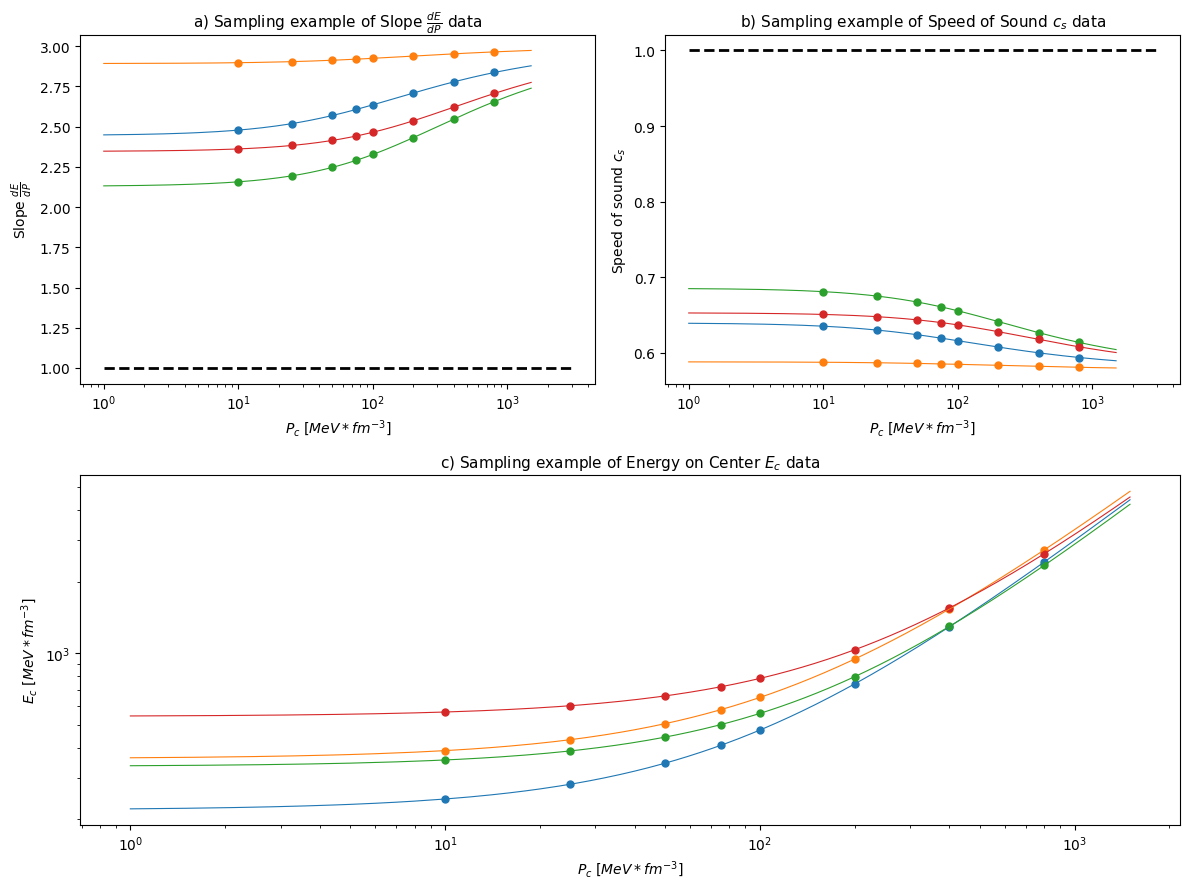

In [7]:
fig_sample_EOS_QS, axes_sample_EOS_QS = plt.subplots(figsize=(12,9))
axis_sample_slope_QS = plt.subplot2grid((2,2),(0,0))
axis_sample_cs_QS = plt.subplot2grid((2,2),(0,1))
axis_sample_energy_QS = plt.subplot2grid((2,2),(1,0),colspan=2)


# Pressure points, on which the values of Slope (dE_dP) and Energy density will be collected
pressure_points = [10,25,50,75,100,200,400,800]

# Sampling Slope (dE_dP) and Energy density data without observational noise (1 sample per EOS curve)
slope_sample_CFL_50,energy_sample_CFL_50 = cflQSdata().sample_EOS("CFL-50_sol.csv",Pc_points=pressure_points,noiseSl_mv=0,noiseSl_std=0,noiseEc_mv=0,noiseEc_std=0)
slope_sample_CFL_150,energy_sample_CFL_150 = cflQSdata().sample_EOS("CFL-150_sol.csv",Pc_points=pressure_points,noiseSl_mv=0,noiseSl_std=0,noiseEc_mv=0,noiseEc_std=0)
slope_sample_CFL_250,energy_sample_CFL_250 = cflQSdata().sample_EOS("CFL-250_sol.csv",Pc_points=pressure_points,noiseSl_mv=0,noiseSl_std=0,noiseEc_mv=0,noiseEc_std=0)
slope_sample_CFL_400,energy_sample_CFL_400 = cflQSdata().sample_EOS("CFL-400_sol.csv",Pc_points=pressure_points,noiseSl_mv=0,noiseSl_std=0,noiseEc_mv=0,noiseEc_std=0)

# Plotting the Slope (dE_dP) sampling data
axis_sample_slope_QS.plot(pressure_points,slope_sample_CFL_50,".",ms=10,color='#1f77b4')
axis_sample_slope_QS.plot(pressure_points,slope_sample_CFL_150,".",ms=10,color='#ff7f0e')
axis_sample_slope_QS.plot(pressure_points,slope_sample_CFL_250,".",ms=10,color='#2ca02c')
axis_sample_slope_QS.plot(pressure_points,slope_sample_CFL_400,".",ms=10,color='#d62728')

# Plotting the causality limit curve, i.e. the curve Slope=1
axis_sample_slope_QS.plot([1,3000],[1,1],"--",lw=2,color="black")

# Plotting the respective Slope (dE_dP) vs Pressure 2D curves
cflQSdata().plot_slope_curve("CFL-50_sol.csv",axis_sample_slope_QS,'#1f77b4')
cflQSdata().plot_slope_curve("CFL-150_sol.csv",axis_sample_slope_QS,'#ff7f0e')
cflQSdata().plot_slope_curve("CFL-250_sol.csv",axis_sample_slope_QS,'#2ca02c')
cflQSdata().plot_slope_curve("CFL-400_sol.csv",axis_sample_slope_QS,'#d62728')

# Adding labels, bounds and scale on axes and title for clarity
axis_sample_slope_QS.set_title(r"a) Sampling example of Slope $\frac{dE}{dP}$ data", fontsize=11)
axis_sample_slope_QS.set_xlabel(r"$P_c$ $[MeV*fm^{-3}]$",fontsize=10)
axis_sample_slope_QS.set_ylabel(r"Slope $\frac{dE}{dP}$",fontsize=10)
axis_sample_slope_QS.set_xscale("log")
#axis_sample_slope_QS.set_yscale("log")

# Getting the Speed of Sound (c_s) sampling data
cs_sample_CFL_50 = np.sqrt(1/np.array(slope_sample_CFL_50))
cs_sample_CFL_150 = np.sqrt(1/np.array(slope_sample_CFL_150))
cs_sample_CFL_250 = np.sqrt(1/np.array(slope_sample_CFL_250))
cs_sample_CFL_400 = np.sqrt(1/np.array(slope_sample_CFL_400))

# Plotting the Speed of Sound (c_s) sampling data
axis_sample_cs_QS.plot(pressure_points,cs_sample_CFL_50,".",ms=10,color='#1f77b4')
axis_sample_cs_QS.plot(pressure_points,cs_sample_CFL_150,".",ms=10,color='#ff7f0e')
axis_sample_cs_QS.plot(pressure_points,cs_sample_CFL_250,".",ms=10,color='#2ca02c')
axis_sample_cs_QS.plot(pressure_points,cs_sample_CFL_400,".",ms=10,color='#d62728')

# Plotting the causality limit curve, i.e. the curve Slope=1
axis_sample_cs_QS.plot([1,3000],[1,1],"--",lw=2,color="black")

# Plotting the respective Speed of Sound vs Pressure 2D curves
cflQSdata().plot_cs_curve("CFL-50_sol.csv",axis_sample_cs_QS,'#1f77b4')
cflQSdata().plot_cs_curve("CFL-150_sol.csv",axis_sample_cs_QS,'#ff7f0e')
cflQSdata().plot_cs_curve("CFL-250_sol.csv",axis_sample_cs_QS,'#2ca02c')
cflQSdata().plot_cs_curve("CFL-400_sol.csv",axis_sample_cs_QS,'#d62728')

# Adding labels, bounds and scale on axes and title for clarity
axis_sample_cs_QS.set_title(r"b) Sampling example of Speed of Sound $c_s$ data", fontsize=11)
axis_sample_cs_QS.set_xlabel(r"$P_c$ $[MeV*fm^{-3}]$",fontsize=10)
axis_sample_cs_QS.set_ylabel(r"Speed of sound $c_s$",fontsize=10)
axis_sample_cs_QS.set_xscale("log")
#axis_sample_cs_QS.set_yscale("log")


# Plotting the Energy sampling data
axis_sample_energy_QS.plot(pressure_points,energy_sample_CFL_50,".",ms=10,color='#1f77b4')
axis_sample_energy_QS.plot(pressure_points,energy_sample_CFL_150,".",ms=10,color='#ff7f0e')
axis_sample_energy_QS.plot(pressure_points,energy_sample_CFL_250,".",ms=10,color='#2ca02c')
axis_sample_energy_QS.plot(pressure_points,energy_sample_CFL_400,".",ms=10,color='#d62728')

# Plotting the respective EOS 2D curves
cflQSdata().plot_EOS_curve("CFL-50_sol.csv",axis_sample_energy_QS,'#1f77b4')
cflQSdata().plot_EOS_curve("CFL-150_sol.csv",axis_sample_energy_QS,'#ff7f0e')
cflQSdata().plot_EOS_curve("CFL-250_sol.csv",axis_sample_energy_QS,'#2ca02c')
cflQSdata().plot_EOS_curve("CFL-400_sol.csv",axis_sample_energy_QS,'#d62728')

# Adding labels, bounds and scale on axes and title for clarity
axis_sample_energy_QS.set_title(r"c) Sampling example of Energy on Center $E_c$ data", fontsize=11)
axis_sample_energy_QS.set_xlabel(r"$P_c$ $[MeV*fm^{-3}]$",fontsize=10)
axis_sample_energy_QS.set_ylabel(r"$E_c$ $[MeV*fm^{-3}]$",fontsize=10)
axis_sample_energy_QS.set_xscale("log")
axis_sample_energy_QS.set_yscale("log")


# Removing the frame and the ticks of the total figure
axes_sample_EOS_QS.spines['top'].set_visible(False)
axes_sample_EOS_QS.spines['right'].set_visible(False)
axes_sample_EOS_QS.spines['bottom'].set_visible(False)
axes_sample_EOS_QS.spines['left'].set_visible(False)
axes_sample_EOS_QS.set_xticks([])
axes_sample_EOS_QS.set_yticks([])
plt.tight_layout()
plt.show()

#### **2.2 Sampling and plotting  Mass and Radius data, along with their respective $M-R$ curves**

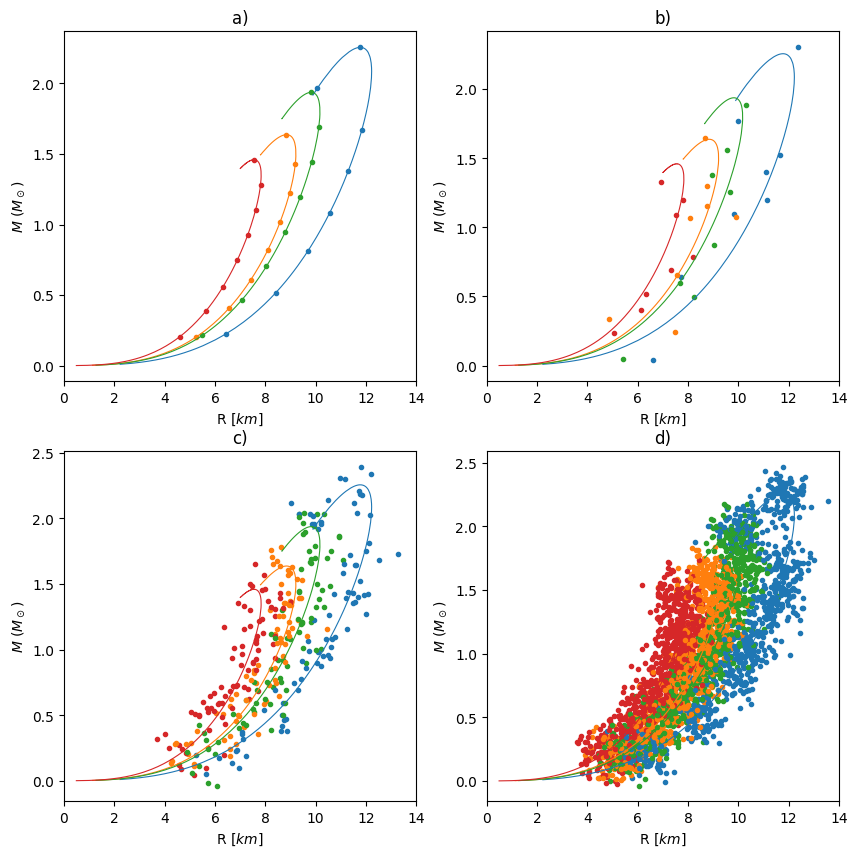

In [8]:
# Defining the figure and the axes
fig_sample_MR_QS,axes_sample_MR_QS = plt.subplots(2,2,figsize=(10,10))
points_mr = 8

# Sampling Mass and Radius data without observational noise (1 sample per M-R curve)
mass_sample_CFL_50_1,radius_sample_CFL_50_1 = cflQSdata().sample_MR("CFL-50_sol.csv",0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_CFL_150_1,radius_sample_CFL_150_1 = cflQSdata().sample_MR("CFL-150_sol.csv",0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_CFL_250_1,radius_sample_CFL_250_1 = cflQSdata().sample_MR("CFL-250_sol.csv",0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_CFL_400_1,radius_sample_CFL_400_1 = cflQSdata().sample_MR("CFL-400_sol.csv",0.2,points_mr,noiseM_std=0,noiseR_std=0)

# Plotting these sampling data without observational noise
axes_sample_MR_QS[0,0].plot(radius_sample_CFL_50_1,mass_sample_CFL_50_1,".")
axes_sample_MR_QS[0,0].plot(radius_sample_CFL_150_1,mass_sample_CFL_150_1,".")
axes_sample_MR_QS[0,0].plot(radius_sample_CFL_250_1,mass_sample_CFL_250_1,".")
axes_sample_MR_QS[0,0].plot(radius_sample_CFL_400_1,mass_sample_CFL_400_1,".")

# Plotting the respective M-R curves
cflQSdata().plot_MR_curve("CFL-50_sol.csv",axes_sample_MR_QS[0,0],'#1f77b4',"grey")
cflQSdata().plot_MR_curve("CFL-150_sol.csv",axes_sample_MR_QS[0,0],'#ff7f0e',"grey")
cflQSdata().plot_MR_curve("CFL-250_sol.csv",axes_sample_MR_QS[0,0],'#2ca02c',"grey")
cflQSdata().plot_MR_curve("CFL-400_sol.csv",axes_sample_MR_QS[0,0],'#d62728',"grey")

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_QS[0,0].set_title("a)",fontsize=12)
axes_sample_MR_QS[0,0].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_QS[0,0].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_QS[0,0].set_xbound([0,14])



# Sampling Mass and Radius data with observational noise (1 sample per M-R curve)
mass_sample_CFL_50_1n,radius_sample_CFL_50_1n = cflQSdata().sample_MR("CFL-50_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_CFL_150_1n,radius_sample_CFL_150_1n = cflQSdata().sample_MR("CFL-150_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_CFL_250_1n,radius_sample_CFL_250_1n = cflQSdata().sample_MR("CFL-250_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_CFL_400_1n,radius_sample_CFL_400_1n = cflQSdata().sample_MR("CFL-400_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

# Plotting these sampling data without observational noise
axes_sample_MR_QS[0,1].plot(radius_sample_CFL_50_1n,mass_sample_CFL_50_1n,".")
axes_sample_MR_QS[0,1].plot(radius_sample_CFL_150_1n,mass_sample_CFL_150_1n,".")
axes_sample_MR_QS[0,1].plot(radius_sample_CFL_250_1n,mass_sample_CFL_250_1n,".")
axes_sample_MR_QS[0,1].plot(radius_sample_CFL_400_1n,mass_sample_CFL_400_1n,".")

# Plotting the respective M-R curves
cflQSdata().plot_MR_curve("CFL-50_sol.csv",axes_sample_MR_QS[0,1],'#1f77b4',"grey")
cflQSdata().plot_MR_curve("CFL-150_sol.csv",axes_sample_MR_QS[0,1],'#ff7f0e',"grey")
cflQSdata().plot_MR_curve("CFL-250_sol.csv",axes_sample_MR_QS[0,1],'#2ca02c',"grey")
cflQSdata().plot_MR_curve("CFL-400_sol.csv",axes_sample_MR_QS[0,1],'#d62728',"grey")

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_QS[0,1].set_title("b)",fontsize=12)
axes_sample_MR_QS[0,1].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_QS[0,1].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_QS[0,1].set_xbound([0,14])



# Sampling Mass and Radius data with observational noise (10 samples per M-R curve)
for i in range(0,10):
    mass_sample_CFL_50_10n,radius_sample_CFL_50_10n = cflQSdata().sample_MR("CFL-50_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_CFL_150_10n,radius_sample_CFL_150_10n = cflQSdata().sample_MR("CFL-150_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_CFL_250_10n,radius_sample_CFL_250_10n = cflQSdata().sample_MR("CFL-250_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_CFL_400_10n,radius_sample_CFL_400_10n = cflQSdata().sample_MR("CFL-400_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

    # Plotting these sampling data without observational noise
    axes_sample_MR_QS[1,0].plot(radius_sample_CFL_50_10n,mass_sample_CFL_50_10n,".",color='#1f77b4')
    axes_sample_MR_QS[1,0].plot(radius_sample_CFL_150_10n,mass_sample_CFL_150_10n,".",color='#ff7f0e')
    axes_sample_MR_QS[1,0].plot(radius_sample_CFL_250_10n,mass_sample_CFL_250_10n,".",color='#2ca02c')
    axes_sample_MR_QS[1,0].plot(radius_sample_CFL_400_10n,mass_sample_CFL_400_10n,".",color='#d62728')

# Plotting the respective M-R curves
cflQSdata().plot_MR_curve("CFL-50_sol.csv",axes_sample_MR_QS[1,0],'#1f77b4',"grey")
cflQSdata().plot_MR_curve("CFL-150_sol.csv",axes_sample_MR_QS[1,0],'#ff7f0e',"grey")
cflQSdata().plot_MR_curve("CFL-250_sol.csv",axes_sample_MR_QS[1,0],'#2ca02c',"grey")
cflQSdata().plot_MR_curve("CFL-400_sol.csv",axes_sample_MR_QS[1,0],'#d62728',"grey")

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_QS[1,0].set_title("c)",fontsize=12)
axes_sample_MR_QS[1,0].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_QS[1,0].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_QS[1,0].set_xbound([0,14])



# Sampling Mass and Radius data with observational noise (100 samples per M-R curve)
for i in range(0,100):
    mass_sample_CFL_50_100n,radius_sample_CFL_50_100n = cflQSdata().sample_MR("CFL-50_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_CFL_150_100n,radius_sample_CFL_150_100n = cflQSdata().sample_MR("CFL-150_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_CFL_250_100n,radius_sample_CFL_250_100n = cflQSdata().sample_MR("CFL-250_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_CFL_400_100n,radius_sample_CFL_400_100n = cflQSdata().sample_MR("CFL-400_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

    # Plotting these sampling data without observational noise
    axes_sample_MR_QS[1,1].plot(radius_sample_CFL_50_100n,mass_sample_CFL_50_100n,".",color='#1f77b4')
    axes_sample_MR_QS[1,1].plot(radius_sample_CFL_150_100n,mass_sample_CFL_150_100n,".",color='#ff7f0e')
    axes_sample_MR_QS[1,1].plot(radius_sample_CFL_250_100n,mass_sample_CFL_250_100n,".",color='#2ca02c')
    axes_sample_MR_QS[1,1].plot(radius_sample_CFL_400_100n,mass_sample_CFL_400_100n,".",color='#d62728')

# Plotting the respective M-R curves
cflQSdata().plot_MR_curve("CFL-50_sol.csv",axes_sample_MR_QS[1,1],'#1f77b4',"grey")
cflQSdata().plot_MR_curve("CFL-150_sol.csv",axes_sample_MR_QS[1,1],'#ff7f0e',"grey")
cflQSdata().plot_MR_curve("CFL-250_sol.csv",axes_sample_MR_QS[1,1],'#2ca02c',"grey")
cflQSdata().plot_MR_curve("CFL-400_sol.csv",axes_sample_MR_QS[1,1],'#d62728',"grey")

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_QS[1,1].set_title("d)",fontsize=12)
axes_sample_MR_QS[1,1].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_QS[1,1].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_QS[1,1].set_xbound([0,14])

#### **2.3 Generating and saving data for regression purposes**

In [3]:
# Pressure points, on which the values of Slope (dE_dP) and Energy density will be collected
pressure_points = [10,25,50,75,100,200,400,800]
points_mr = 8

# 1 sample per EOS, without observational noise
filesave = "QS_reg_data_pp8mr8s1" # name of the .csv, where the regression data will be recorded
cflQSdata().gen_reg_data(filesave,samples_per_EOS=1,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,noises_mv=[0,0,0,0],noises_std=[0,0,0,0])

# 10 samples per EOS, with observational noise for Mass and Radius data
filesave = "QS_reg_data_pp8mr8s10" # name of the .csv, where the regression data will be recorded
cflQSdata().gen_reg_data(filesave,samples_per_EOS=10,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,noises_mv=[0,0,0,0],noises_std=[0.1,0.5,0,0])

# 100 samples per EOS, with observational noise for Mass and Radius data
filesave = "QS_reg_data_pp8mr8s100" # name of the .csv, where the regression data will be recorded
cflQSdata().gen_reg_data(filesave,samples_per_EOS=100,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,noises_mv=[0,0,0,0],noises_std=[0.1,0.5,0,0])

>The recording process of regression data on the "QS_reg_data_pp8mr8s1.csv" file has been completed !!!
>>The recording process of rowwise shuffled regression data on the "QS_reg_data_pp8mr8s1_rwshuffled.csv" file has also been completed !!!


>The recording process of regression data on the "QS_reg_data_pp8mr8s10.csv" file has been completed !!!
>>The recording process of rowwise shuffled regression data on the "QS_reg_data_pp8mr8s10_rwshuffled.csv" file has also been completed !!!


>The recording process of regression data on the "QS_reg_data_pp8mr8s100.csv" file has been completed !!!
>>The recording process of rowwise shuffled regression data on the "QS_reg_data_pp8mr8s100_rwshuffled.csv" file has also been completed !!!


